## PCA- Assignment

Load a dataset (e.g., Wine dataset).

Standardize features.

Apply PCA, plot explained variance ratio.

Visualize data projected onto first two PCs.

Try reconstructing original data from PCs and compute reconstruction error.

Explore effects of scaling and outliers on PCA results.

1. Loading the dataset

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load wine dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


2. Standardizing the features

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


3. Applying PCA and plotting explained variance ratio

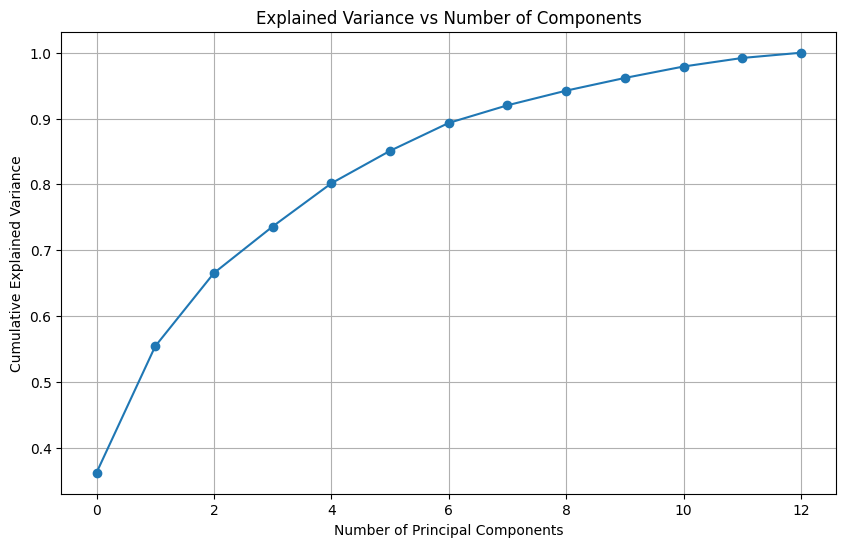

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()


4. Visualizing the data in first 2 Principal Component

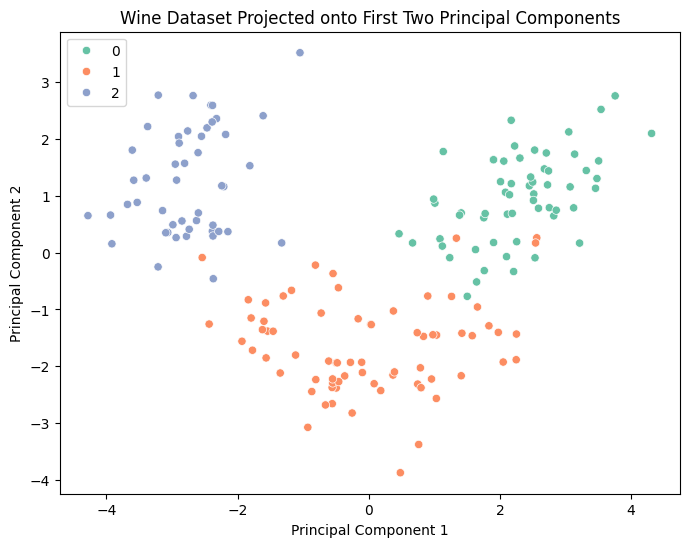

In [4]:
import seaborn as sns

pca_2 = PCA(n_components=2)
X_2D = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=y, palette='Set2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wine Dataset Projected onto First Two Principal Components')
plt.show()


5. Reconstructing the data and computing the reconstruction error

In [5]:
# Reduce to 5 PCs, then reconstruct
pca_reduced = PCA(n_components=5)
X_reduced = pca_reduced.fit_transform(X_scaled)
X_reconstructed = pca_reduced.inverse_transform(X_reduced)

# Compute Reconstruction Error (MSE)
from sklearn.metrics import mean_squared_error

reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f"Reconstruction Error (MSE with 5 PCs): {reconstruction_error:.4f}")


Reconstruction Error (MSE with 5 PCs): 0.1984


6. Effects of scaling and Outliers

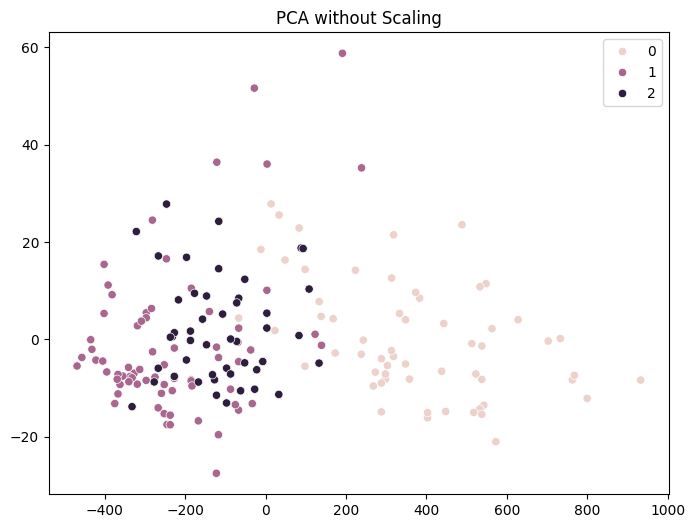

In [6]:
# PCA without scaling
pca_noscale = PCA(n_components=2)
X_noscale_pca = pca_noscale.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_noscale_pca[:, 0], y=X_noscale_pca[:, 1], hue=y)
plt.title('PCA without Scaling')
plt.show()


6.1 with artificial outliers

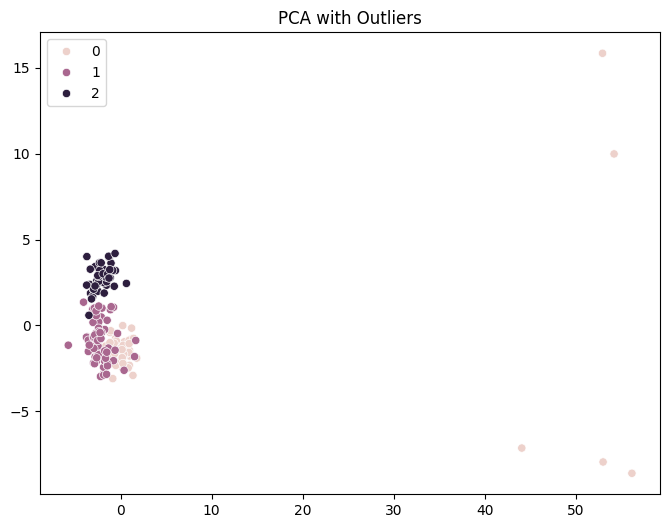

In [7]:
# Add outliers
import numpy as np
X_outlier = X_scaled.copy()
X_outlier[:5] += np.random.normal(15, 5, size=X_outlier[:5].shape)

# Apply PCA with outliers
pca_outlier = PCA(n_components=2)
X_outlier_pca = pca_outlier.fit_transform(X_outlier)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_outlier_pca[:, 0], y=X_outlier_pca[:, 1], hue=y)
plt.title('PCA with Outliers')
plt.show()


### 📝 Summary

- PCA helped reduce dimensionality while preserving variance.

- The first few components explain most of the variance (>90% with 5 components).

- Reconstruction Error helps judge how much information is lost.

- Scaling is critical — PCA results degrade without it.

- Outliers significantly distort PCA projection results.